In [219]:
import mst
import networkx as nx
import numpy as np
import heapq
from typing import Union

In [220]:
g = mst.Graph('data/small.csv')
g.adj_mat

array([[0., 5., 0., 5.],
       [5., 0., 1., 2.],
       [0., 1., 0., 4.],
       [5., 2., 4., 0.]])

In [221]:
len(np.where(g.adj_mat == 0)[0])

6

{(0, 1): Text(0.012337238859542271, 0.6023532149312407, '5.0'),
 (0, 3): Text(-0.3431371443275642, 0.24959188873650634, '5.0'),
 (1, 0): Text(0.012337238859542271, 0.6023532149312407, '5.0'),
 (1, 2): Text(0.34313714432756415, -0.24959188873650623, '1.0'),
 (1, 3): Text(0.06592097759399981, 0.1480548963322531, '2.0'),
 (2, 1): Text(0.34313714432756415, -0.24959188873650623, '1.0'),
 (2, 3): Text(-0.012337238859542299, -0.6023532149312407, '4.0'),
 (3, 0): Text(-0.3431371443275642, 0.24959188873650634, '5.0'),
 (3, 1): Text(0.06592097759399981, 0.1480548963322531, '2.0'),
 (3, 2): Text(-0.012337238859542299, -0.6023532149312407, '4.0')}

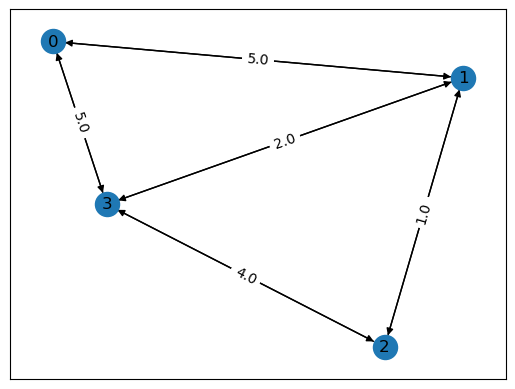

In [222]:
G = nx.from_numpy_matrix(np.matrix(g.adj_mat), create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw_networkx(G, layout)

labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)


visited = {v1}

store all outgoing edges from visited in a priority queue

while (not all vertices in visited):
	
    pop the lowest weight edge from the priority queue
	
    if the destination vertex of the edge is not in visited:
	
        add this edge to the MST

        add the destination vertex to visited

        add all outgoing edges from the destination vertex into priority queue

In [223]:
def _process_edges(edge_array):
        
    """TODO"""
    edges_to_keep = list(np.where(edge_array > 0)[0])

#     print(edges_to_keep)
    return [(edge_array[i], i) for i in edges_to_keep]


In [224]:
t = mst.Graph('data/small.csv')

g = t.adj_mat

np.random.seed(3)

#remove loops
for i in range(g.shape[0]):
    g[i,i] = 0
    
#select random node as start node
prev = np.random.randint(g.shape[0])
h = _process_edges(g[prev])
#add edges to heap
heapq.heapify(h)
visited = [prev]

mst_rv = np.zeros_like(g)

all_nodes = set(np.arange(g.shape[0]))

while set(visited) != all_nodes:
        
    if len(h) == 0:
        
        raise ValueError("Heap became empty before all nodes were added to MST")
        
    weight, node_index = heapq.heappop(h)
        
    if node_index in visited:
        continue
    
    #add to mst
    mst_rv[prev,node_index] = weight
    mst_rv[node_index,prev] = weight
    
    #add child edges to heap
    next_edges = _process_edges(g[node_index])
    for val, idx in next_edges:
        heapq.heappush(h, (val,idx))
        
    #add node to visited
    visited += [node_index]
